In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

nsamples, nx, ny = x_train.shape
x_train_2D = x_train.reshape((nsamples,nx*ny))

#standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train_2D)


11490434/11490434 [==============================] - 0s 0us/step


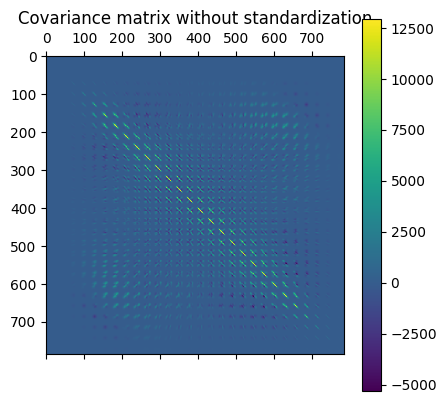

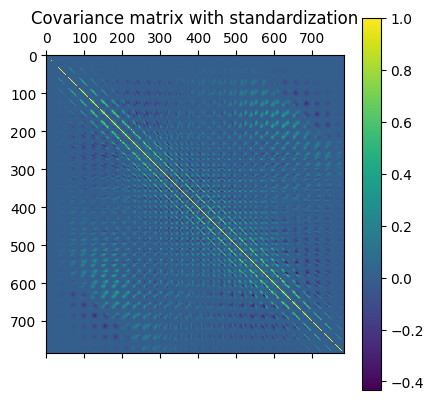

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# determine and plot covariance matrix

cov_mat = np.cov(x_train_2D.T)
plt.matshow(cov_mat)
plt.colorbar()
plt.title("Covariance matrix without standardization")
plt.savefig('cov1.png')
plt.show()


cov_mat = np.cov(x_train_std.T)
plt.matshow(cov_mat)
plt.colorbar()
plt.title("Covariance matrix with standardization")
plt.savefig('cov2.png')
plt.show()



In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[ 4.04876351e+01  2.92416975e+01  2.68118045e+01  2.06866182e+01
  1.80766501e+01  1.57331779e+01  1.37906091e+01  1.25175891e+01
  1.10067953e+01  1.00504971e+01  9.62045779e+00  8.63097356e+00
  7.99159687e+00  7.81488215e+00  7.37553786e+00  7.13058751e+00
  6.71398002e+00  6.60400749e+00  6.40604846e+00  6.23737743e+00
  5.93229172e+00  5.76059855e+00  5.48403364e+00  5.31859721e+00
  5.12873534e+00  4.96062446e+00  4.90533662e+00  4.70843497e+00
  4.52919760e+00  4.39470849e+00  4.27522172e+00  4.21399693e+00
  4.09838079e+00  4.03181137e+00  3.97713624e+00  3.86052409e+00
  3.80864021e+00  3.72563426e+00  3.64393543e+00  3.44169730e+00
  3.41624517e+00  3.36378527e+00  3.25773631e+00  3.23620323e+00
  3.20478100e+00  3.17911021e+00  3.14205728e+00  3.08588859e+00
  3.06076556e+00  3.03759974e+00  2.90171955e+00  2.86408562e+00
  2.84980787e+00  2.82374220e+00  2.69168208e+00  2.71778127e+00
  2.76632955e+00  2.65850712e+00  2.61669482e+00  2.57622805e+00
  2.5266222

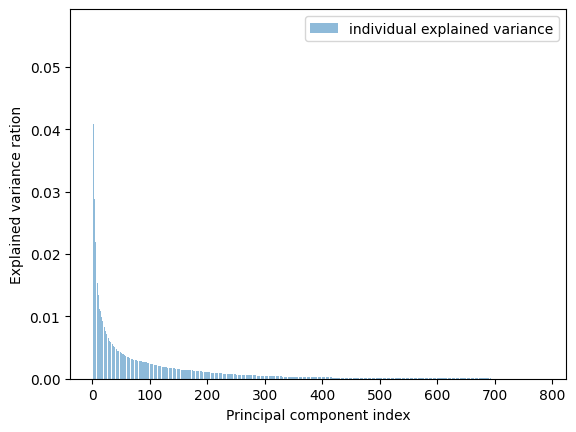

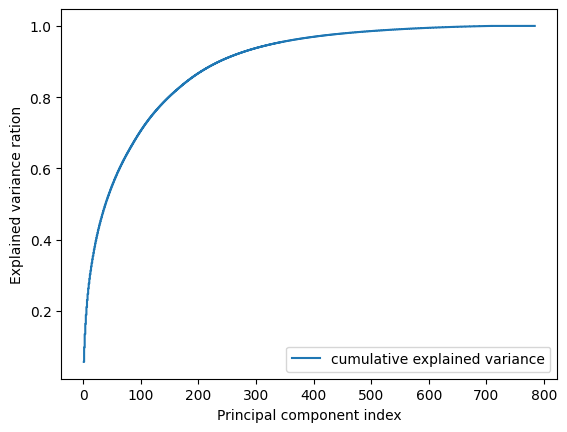

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in 
          sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1,785), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig('foo.png')
plt.show()

import matplotlib.pyplot as plt2
plt2.step(range(1,785), cum_var_exp, where='mid', label='cumulative explained variance')
plt2.ylabel('Explained variance ration')
plt2.xlabel('Principal component index')
plt2.legend(loc='best')
plt2.savefig('baa.png')
plt2.show()



In [ ]:
# Make a List of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])
                for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],
                eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

print(eigen_pairs[0][1][:,np.newaxis])

Matrix W:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.36760474e-05]
 [-1.67076577e-05]
 [-1.51736771e-04]
 [-1.51736771e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-4.10427763e-04]
 [-5.57713521e-04]
 [-1.44637186e-03]
 [-2.06746188e-03]
 [-3.11510893e-03]
 [-4.18512786e-03]
 [-4.17930027e-03]
 [-3.76567989e-03]
 [-3.10864021e-03]
 [-2.53192104e-03]
 [-2.46458967e-03]
 [-1.68414105e-03]
 [-1.02887437e-03]
 [-6.74195801e-04]
 [-2.76199891e-04]
 [ 5.07037901e-04]
 [ 3.33055762e-04

In [ ]:
x_train_std[0].dot(w)

x_train_pca = x_train_std.dot(w)

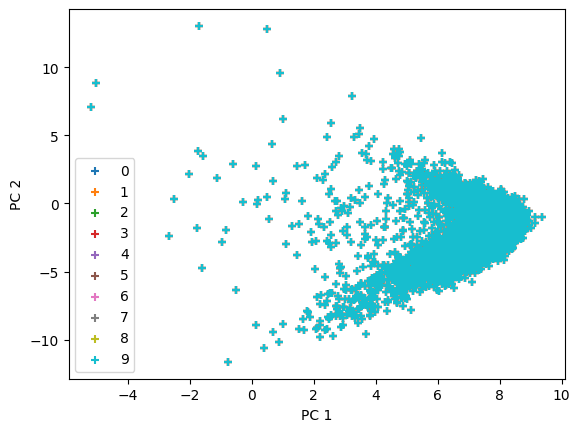

In [ ]:
'plot the resulting dataset'
import matplotlib.pyplot as plt


colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#markers = ['s', 'x', 'o', '*', 'h', 'X', 'D', '^', '2', '+']
markers = ['+', '+', '+', '+', '+', '+', '+', '+', '+', '+']

for l, c, m in zip(np.unique(y_train), colors, markers) :
  plt.scatter(x_train_pca[y_train==1, 0], x_train_pca[y_train==1, 1], c=c, label=l, marker=m)
  plt.xlabel('PC 1')
  plt.ylabel('PC 2')
  plt.legend(loc='lower left')
  #plt.show()